## Reproducible Data Analysis for College Scorecard  

Essential links:
- College Scorecard: https://collegescorecard.ed.gov/
- College Scorecard Data: https://collegescorecard.ed.gov/data/ (Use the data linked as "Most Recent Data")
- Full data documentation: https://collegescorecard.ed.gov/assets/FullDataDocumentation.pdf
- Data dictionary: https://collegescorecard.ed.gov/assets/CollegeScorecardDataDictionary-09-08-2015.csv

Additional links:
- Some background context on the college scorecard: http://www.nytimes.com/2015/09/13/us/with-website-to-research-colleges-obama-abandons-ranking-system.html
- College Scorecard StackExchange: http://opendata.stackexchange.com/questions/tagged/collegescorecard


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from pandas import Series

# Makes it so that you can scroll horizontally to see all columns of an output DataFrame
pd.set_option('display.max_columns', None)

# This magic function allows you to see the charts directly within the notebook. 
%matplotlib inline

# This command will make the plots more attractive by adopting the commone style of ggplot
matplotlib.style.use("ggplot")

### Question 1. What percentage of undergraduate college students attend for-profit schools?

In [4]:
df1 = pd.read_csv("C:\Users\Deon\Downloads\data.csv") #read the file
test1 = df1[df1['CONTROL'] == 3] #gives us all the for-profit schools 
a = test1['UGDS'].sum()
no = df1['UGDS']

b = no.sum()
c= a/b*100  #gives % of students


print "% of undergraduate college students attend for-profit schools is ", c

10.6088659331
% of undergraduate college students attend for-profit schools is  10.6088659331


### Question 2. In comparing "public", "private", and "for-profit" schools which type of school has the highest median completion rate for students? Create a bar chart that shows the comparison (be sure to use appropriately labeled axes, tick marks, title, and colors). 

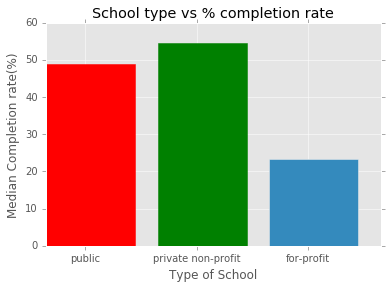

In [238]:
public = df1[df1['CONTROL'] == 1] #public
private = df1[df1['CONTROL'] == 2] #private non-profit
profit = df1[df1['CONTROL'] == 3] #for-profit

a = public['C200_4'].dropna().median()*100 #completion rate within 8 years for public schools
b = private['C200_4'].dropna().median()*100 #completion rate within 8 years for private non-profit schools
c = profit['C200_4'].dropna().median()*100 #completion rate within 8 years for for-profit schools

ids = [x for x in range(len(combined))]
ind = np.arange(3)
ax = plt.bar(ids, combined)
plt.xlabel('Type of School')
plt.ylabel('Median Completion rate(%)')
plt.xticks(ind+0.35, ('public', 'private non-profit', 'for-profit'))
ax[0].set_color('r') 
ax[1].set_color('g') 

plt.title('School type vs % completion rate')



### Question 3. Among predominently four-year schools, what is the median debt of graduates in dollars? Do men or women typically have higher debt and by how much?

In [6]:
four_year = df1[df1['PREDDEG'] ==3]

#four_year['DEBT_MDN'].median()

a = four_year['DEBT_MDN'].convert_objects(convert_numeric=True).median()

print "median debt of graduates in dollars is $",a

b = four_year['MALE_DEBT_MDN'].convert_objects(convert_numeric=True).median() # male debt
print "Men have a median debt of $",b
c = four_year['FEMALE_DEBT_MDN'].convert_objects(convert_numeric=True).median() #female debt
print "Women have a median debt of $",c

difference = c-b

print "Therefore Women have a higher median debt by $",difference

median debt of graduates in dollars is $ 17500.0
Men have a median debt of $ 16361.25
Women have a median debt of $ 18250.0
Therefore Women have a higher median debt by $ 1888.75


C:\Users\Deon\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Deon\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Deon\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


### Question 4. How do predominently four-year schools compare to predominently two-year schools in terms of the percentage of students that are unable to repay even $1 of their loan within three years of graduation? Amongst all four-year schools and excluding schools with a "special focus" according to the Carnegie classification, which school has the highest percentage of such students?

In [7]:
four_year = df1[df1['PREDDEG'] ==3] #4-year schools

a = four_year['COMPL_RPY_3YR_RT'].convert_objects(convert_numeric=True).mean() #taking the average and converting all elements to numeric


print "% of people who are unable to pay even $1 of their loan within three years of graduation at 4 year schools is: ", 1-a
two_year = df1[df1['PREDDEG'] ==2] #2-year schools

b= two_year['COMPL_RPY_3YR_RT'].convert_objects(convert_numeric=True).mean() #taking the average and converting all elements to numeric
print "% of people who are unable to pay even $1 of their loan within three years of graduation at 2 year schools is: ", 1-b

print "Therefore nearly twice as many people at 2 year schools are unable to repay even $1 of their loan within three years of graduation as compared to 4-year school graduates"
carnegie = four_year[four_year["CCBASIC"] != 24]  #excluding special focus schools
carnegie = carnegie[carnegie["CCBASIC"] != 25]  
carnegie = carnegie[carnegie["CCBASIC"] != 26]  
carnegie = carnegie[carnegie["CCBASIC"] != 27]  
carnegie = carnegie[carnegie["CCBASIC"] != 28]  
carnegie = carnegie[carnegie["CCBASIC"] != 29]  
carnegie = carnegie[carnegie["CCBASIC"] != 30]  
carnegie = carnegie[carnegie["CCBASIC"] != 31]  
carnegie = carnegie[carnegie["CCBASIC"] != 32]  


carnegie = carnegie.sort_values(by="RPY_3YR_RT")
print carnegie

print "From the below above Carnegie list, we know that Arkansas Baptist College has the highest number of students unable to pay even $1 of their loan within three years of graduation"

% of people who are unable to pay even $1 of their loan within three years of graduation at 4 year schools is:  0.189034244777
% of people who are unable to pay even $1 of their loan within three years of graduation at 2 year schools is:  0.36420004161
Therefore nearly twice as many people at 2 year schools are unable to repay even $1 of their loan within three years of graduation as compared to 4-year school graduates
      UNITID    OPEID  opeid6  \
142   106306   108700    1087   
1375  151810  2140800   21408   
3842  220598   349900    3499   
3713  217721   342000    3420   
2950  198862   294200    2942   
3085  201690   302600    3026   
35    101675   102800    1028   
2208  176318   243300    2433   
3709  217624   341700    3417   
4085  228884   363800    3638   
12    101073  1055400   10554   
3843  220604   350100    3501   
2251  177551   246600    2466   
835   133526   147800    1478   
6085  444723  3534300   35343   
1051  140720   158700    1587   
1153  144883  21

C:\Users\Deon\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()
C:\Users\Deon\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


### Question 5. Create two histogram charts in order to compare the average annual cost of attendance for four-year schools and two-year schools (be sure to include appropriate axes, labels, and titles on the charts).

C:\Users\Deon\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Deon\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


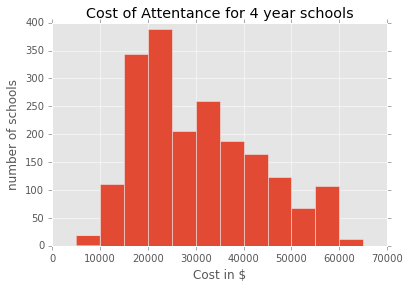

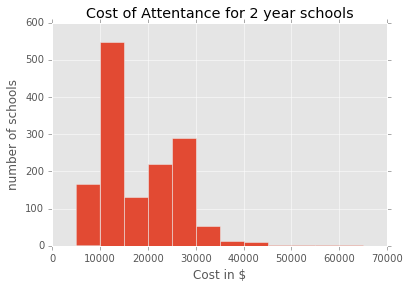

In [191]:
four_year = df1[df1['PREDDEG'] ==3] #4 year schools
a = four_year['COSTT4_A'] #ASSUMPTION: I’ve only considered academic year institutions(COSTT4_A) and NOT program-year institutions (COSTT4_P) to detail the histogram. 
two_year =  df1[df1['PREDDEG'] ==2] # 2 year schools
b=two_year['COSTT4_A']

a = a.convert_objects(convert_numeric=True).dropna() #drop null values

b= b.convert_objects(convert_numeric=True).dropna() #drop null values

bins = [5000,10000,15000,20000,25000,30000,35000,40000,45000,50000,55000,60000,65000]

plt.hist(a,bins,histtype = 'bar')
plt.xlabel('Cost in $')
plt.ylabel('number of schools')
plt.title('Cost of Attentance for 4 year schools')
plt.show()


plt.hist(b,bins,histtype = 'bar')
plt.xlabel('Cost in $')
plt.ylabel('number of schools')
plt.title('Cost of Attentance for 2 year schools')
plt.show()

### Your Own Data-Driven Insight
Come up with a unique insight by analyzing the data in a way that hasn't been considered in the previous questions. You might examine other variables or charting options for instance. Your insight should be easily stated in a sentence or two, or captured by a chart that could be similarly explained in a caption. Spend some time trying to make your insight something that could be a headline for a news article - that could entail some type of surprising result, social inequity, or implication for education policy. Be sure to show your entire code and process for deriving your insight. 

In [10]:

 

four_year = df1[df1['PREDDEG'] ==3] #4-year schools

public_four_year=four_year[four_year["CONTROL"] == 1] #public schools
public_ret_rate = public_four_year['RET_FT4'].mean() #retention rate

print "Public school retention rate is", public_ret_rate*100

private_nonprofit_four_year = four_year[four_year["CONTROL"] == 2] #private non-profit schools
private_nonprofit_ret_rate = private_nonprofit_four_year['RET_FT4'].mean() #retention rate
print "Private non-profit school retention rate is", private_nonprofit_ret_rate*100

four_year_profit=four_year[four_year["CONTROL"] == 3] #private for-profit
profit_ret_rate = four_year_profit['RET_FT4'].mean() #retention rate

print "Private for-profit retention rate is ", profit_ret_rate*100

print "Public and Private non -profit schools 50% more likely to retain Full time students as compared to private for-profit schools"

 Public school retention rate is 74.6163978495
Private non-profit school retention rate is 74.400264731
Private for-profit retention rate is  50.0073003802
Public and Private non -profit schools 50% more likely to retain Full time students as compared to private for-profit schools


### Create a Ranking
Take the first college ranking (i.e. "Schools That Make You Money") discussed in the following article and "re-create" it as best you can using the original data to compute a rating score. Note the methodology at the end of the article carefully, but realize that your actual ratings and ranking will NOT exactly match the ranking shown in the article. The reason for this is that the filtering of schools was done qualitatively (by the journalist) and is therefore not repeatable in a data-driven way.

- Obama Won't Rate Colleges, So We Did:  http://www.npr.org/sections/money/2015/09/18/440973097/obama-wont-rate-colleges-so-we-did

From the article: "A note about the data and methodology. We filtered for schools where the predominant degree granted is a four-year bachelor's degree. We also filter out trade-specific schools and religious programs like seminaries and yeshivas. There are also a few limitations to the income data that the government released. Incomes reported in the data set include only students who took out federal loans from the government. Each institution's score is based on a weighted sum of z-scores for each variable mentioned in the list. Ratings cannot be compared across lists."

In [326]:
from scipy.stats import zscore


school_rank = four_year[four_year["CCBASIC"] != 22]  #filtering out schools not used in analysis
school_rank = school_rank[school_rank["CCBASIC"] != 23]
school_rank = school_rank[school_rank["CCBASIC"] != 24] 
school_rank = school_rank[school_rank["CCBASIC"] != 25]  
school_rank = school_rank[school_rank["CCBASIC"] != 26]
school_rank = school_rank[school_rank["CCBASIC"] != 27]
school_rank = school_rank[school_rank["CCBASIC"] != 28]
school_rank = school_rank[school_rank["CCBASIC"] != 29]
school_rank = school_rank[school_rank["CCBASIC"] != 30]
school_rank = school_rank[school_rank["CCBASIC"] != 31]
school_rank = school_rank[school_rank["CCBASIC"] != 32]

income_10_yrs = school_rank['md_earn_wne_p10'].convert_objects(convert_numeric=True).dropna() #income
z = income_10_yrs                    # initialise array for zscores
z[~np.isnan(income_10_yrs)] = zscore(income_10_yrs[~np.isnan(income_10_yrs)])
school_rank['income_zscore'] = z

on_time_grad = school_rank['C150_4'].convert_objects(convert_numeric=True).dropna() #graduation time
x = on_time_grad                   # initialise array for zscores
x[~np.isnan(on_time_grad)] = zscore(on_time_grad[~np.isnan(on_time_grad)]) #z-score of all values that are not NAN

school_rank['on_time_grad'] = x

private_net = school_rank['NPT4_PRIV'].convert_objects(convert_numeric=True) #net cost for private schools
y = private_net                   # initialise array for zscores
y[~np.isnan(private_net)] = zscore(private_net[~np.isnan(private_net)]) #z-score of all values that are not NAN

school_rank['private_net'] = y

public_net = school_rank['NPT4_PUB'].convert_objects(convert_numeric=True) #net cost for private schools
b = public_net                   # initialise array for zscores
b[~np.isnan(public_net)] = zscore(public_net[~np.isnan(public_net)]) #z-score of all values that are not NAN 

school_rank['public_net'] = b
#formula to calculate rating score
school_rank['rating_public'] = (0.5*school_rank['income_zscore']+0.25*school_rank['on_time_grad'] -0.25*school_rank['public_net'])
school_rank['rating_private'] = (0.5*school_rank['income_zscore']+0.25*school_rank['on_time_grad'] -0.25*school_rank['private_net'])
school_rank['rating'] = school_rank['rating_private'].dropna() + school_rank['rating_public'].dropna() 
combine_ranking = school_rank.sort_values(by="rating", ascending=False)


combine_ranking[["INSTNM","md_earn_wne_p10","income_zscore","on_time_grad", "public_net", "rating"]]

a = school_rank.sort_values(by="rating_private", ascending=False)
a = a[["INSTNM","rating_private"]].head(20) #ranking system is almost similar to NPR
a.index = range(1,len(a) + 1)
print a
b = school_rank.sort_values(by="rating_public", ascending = False) #ranking system is almost similar to NPR
b = b[["INSTNM","rating_public"]].head(20)
b.index = range(1,len(b) + 1)
print b


#note: I have segregated rankings between private and public for better understanding and not kept the combined list but can be 
# easily concatenated to give combined rating



C:\Users\Deon\Anaconda2\lib\site-packages\ipykernel\__main__.py:16: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Deon\Anaconda2\lib\site-packages\ipykernel\__main__.py:21: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


                                         INSTNM  rating_private
1                            Harvard University        3.046511
2         Massachusetts Institute of Technology        2.906576
3                          Princeton University        2.654226
4                           Stanford University        2.642658
5                         Georgetown University        2.244358
6                    University of Pennsylvania        2.219501
7                           Harvey Mudd College        2.126043
8                 Washington and Lee University        2.084255
9   Columbia University in the City of New York        1.934325
10              Stevens Institute of Technology        1.930695
11                              Duke University        1.923840
12                              Yale University        1.876911
13           California Institute of Technology        1.868419
14             Rensselaer Polytechnic Institute        1.866619
15                            Lehigh Uni

C:\Users\Deon\Anaconda2\lib\site-packages\ipykernel\__main__.py:27: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Deon\Anaconda2\lib\site-packages\ipykernel\__main__.py:33: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
